# กฎของเกาส์ (Gauss' Law)

## สนามไฟฟ้าเนื่องจากประจุรูปวงกลม

### การใช้ฟังก์ชันพาราเมตริก (Parametric Function) สำหรับสร้างประจุรูปวงกลม
$$\mathbf{r'}=
\begin{bmatrix}
l\cos(t)\\
l\sin(t)
\end{bmatrix},\quad 0<t<2\pi$$
เมื่อ $l$ คือ รัศมีของวงกลม

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])

### ทดสอบการพล็อตกราฟวงกลมหนึ่งหน่วย
$$x^2+y^2=1$$
ดังนั้น
$$y=\pm\sqrt{1-x^2}$$


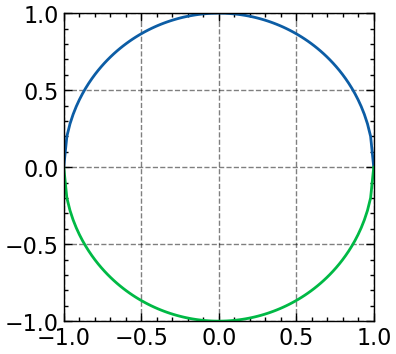

In [3]:
x = np.linspace(-1, 1, 100)
y1 = np.sqrt(1.0 - x**2)
y2 = -np.sqrt(1.0 - x**2)
fig = plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.plot(x, y1)
ax.plot(x, y2)

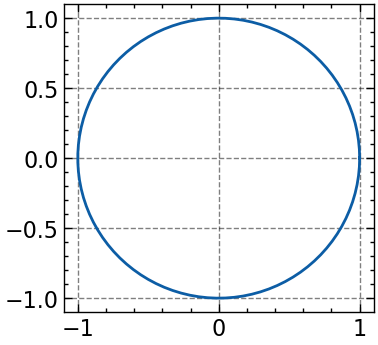

In [5]:
# plot ประจุรูปวงกลมโดยใช้ parameter t
t = np.linspace(0, 2 * np.pi, 100)
x = 1.0 * np.cos(t)
y = 1.0 * np.sin(t)

fig = plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.plot(x, y)

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

สนามไฟฟ้าเนื่องจากประจุแบบเส้นตรง วางขนานกับแนวแกน $x$ ความยาว $5~cm$ โดยพาดผ่านจุด $(0, 1)~cm$ 
และมีความหนาแน่นประจุ $\rho_l=-2.5~\mu C/m$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [70]:
t, x, y = smp.symbols('t, x, y', real=True)
r = smp.Matrix([x, y])
rp = smp.Matrix([t, 1e-2])
R = r - rp
R

Matrix([
[  -t + x],
[y - 0.01]])

In [97]:
dqdt = -2.5e-6 * smp.diff(rp, t).norm()
dqdt

-2.50000000000000e-6

In [98]:
dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3
dEdt

Matrix([
[(22468.8794806529*t - 22468.8794806529*x)/((t - x)**2 + (y - 0.01)**2)**(3/2)],
[  (224.688794806529 - 22468.8794806529*y)/((t - x)**2 + (y - 0.01)**2)**(3/2)]])

In [99]:
dEdt[0]

(22468.8794806529*t - 22468.8794806529*x)/((t - x)**2 + (y - 0.01)**2)**(3/2)

In [100]:
#E = smp.integrate(dEdt, (t, -2.5e-2, 2.5e-2))
#E

In [101]:
# ordinary function
def f(x, y):
    result = x * y
    return result

f(1, 2)

2

In [102]:
# lambda function
f = lambda x, y: x * y
f(1, 2)

2

In [103]:
# Integrate ด้วยวิธี Numerical Method

In [104]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

In [105]:
# Test qaud
quad(lambda x: np.sin(x), np.pi, 2.0 * np.pi)

(-2.0, 2.220446049250313e-14)

In [106]:
def E(x, y):
    Ex = quad(dExdt, -2.5e-2, 2.5e-2, args=(x, y))[0]
    Ey = quad(dEydt, -2.5e-2, 2.5e-2, args=(x, y))[0]
    return np.array([Ex, Ey])

E(2, -5)

array([-14.31294184,  35.85468937])

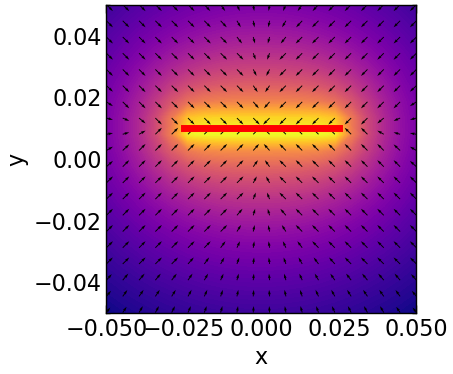

In [109]:
X = np.linspace(-2.5e-2, 2.5e-2, 100)
Y = 1e-2 * np.ones(len(X))

fig = plt.figure(figsize=(4, 4))
ax = field_plot(E, x_min=-5e-2, x_max=5e-2, y_min=-5e-2, y_max=5e-2,\
                num_grids=20, contour=True)
# ax.set_xlim(-0.05e-2, 0.05e-2)
# ax.set_ylim(-5e-2, 5e-2)
ax.plot(X, Y, color='r', linewidth=5)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

In [3]:
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2 * np.pi * radius)
rho_l

6.366197723675813e-06

In [4]:
x, y, t = smp.symbols('x y t', real=True)
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t),
                radius * smp.sin(t)])
R = r - rp
R

Matrix([
[x - 0.025*cos(t)],
[y - 0.025*sin(t)]])

In [5]:
smp.diff(rp, t).norm()

0.025*sqrt(sin(t)**2 + cos(t)**2)

In [7]:
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt.simplify()

1.59154943091895e-7

In [8]:
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt = dqdt.simplify()

In [11]:
dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3
dEdt

Matrix([
[(1430.41329403279*x - 35.7603323508197*cos(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)],
[(1430.41329403279*y - 35.7603323508197*sin(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)]])

In [10]:
# Integrate
smp.integrate(dEdt, [t, 0, 2 * pi])


KeyboardInterrupt



Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

In [12]:
dEdt

Matrix([
[(1430.41329403279*x - 35.7603323508197*cos(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)],
[(1430.41329403279*y - 35.7603323508197*sin(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)]])

In [13]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])
dExdt(2.5, 1, 2)

131.25645006695243

In [14]:
def E(x, y):
    Ex = quad(dExdt, 0, 2 * pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2 * pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [15]:
E(1, 2)

array([ 803.9464421 , 1607.89288419])

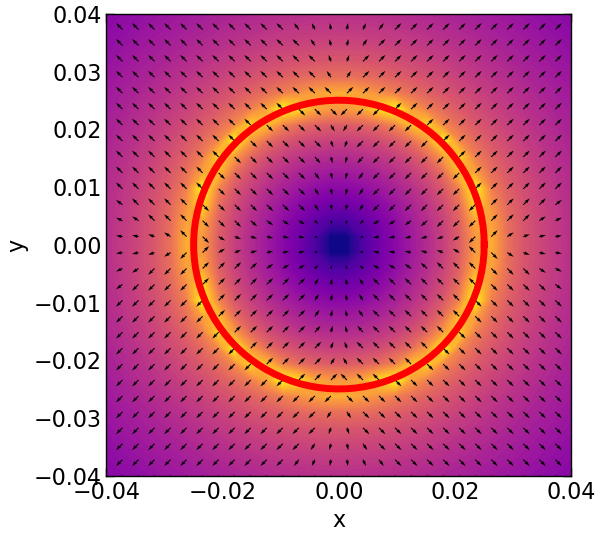

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2,\
                num_grids=30, contour=True)

t = np.linspace(0, 2 * pi, 100)
X = 2.5e-2 * np.cos(t)
Y = 2.5e-2 * np.sin(t)
ax.plot(X, Y, color='r', linewidth=5)

In [23]:
E(-1e-2, 0)

C:\Users\nayot\AppData\Local\Temp\ipykernel_600\1588846601.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Ey = quad(dEydt, 0, 2 * pi, args=(x, y))[0]


array([ 3.49679447e+06, -1.48086675e-09])

สนามไฟฟ้าเนื่องจากประจุรูปวงกลมศูนย์กลางร่วมที่มีรัศมี $5~cm$ และ $4~cm$ ตามลำดับ โดยที่ประจุตัวในมีขนาด $1~\mu C$ และประจุตัวนอกมีขนาด $-1~\mu C$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [55]:
# ประจุตัวใน
Q1 = 1e-6
radius1 = 3e-2
rho_l1 = Q1 / (2.0 * pi * radius1)
# ประจุตัวนอก
Q2 = -1e-6
radius2 = 5e-2
rho_l2 = Q2 / (2.0 * pi * radius2)

In [56]:
x, y, t = smp.symbols('x y t', real=True)
r = smp.Matrix([x, y])
rp1 = smp.Matrix([radius1 * smp.cos(t), radius1 * smp.sin(t)])
R1 = r - rp1

rp2 = smp.Matrix([radius2 * smp.cos(t), radius2 * smp.sin(t)])
R2 = r - rp2

In [57]:
dq1dt = rho_l1 * smp.diff(rp1, t).norm()
dq2dt = rho_l2 * smp.diff(rp2, t).norm()

In [58]:
# หา dEdt
dE1dt = dq1dt / (4.0 * pi * epsilon_0) * R1 / R1.norm()**3
dE2dt = dq2dt / (4.0 * pi * epsilon_0) * R2 / R2.norm()**3
dEdt = dE1dt + dE2dt
dEdt

Matrix([
[-1430.41329403279*(x - 0.05*cos(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.05*cos(t))**2 + (y - 0.05*sin(t))**2)**(3/2) + 1430.41329403279*(x - 0.03*cos(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.03*cos(t))**2 + (y - 0.03*sin(t))**2)**(3/2)],
[-1430.41329403279*(y - 0.05*sin(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.05*cos(t))**2 + (y - 0.05*sin(t))**2)**(3/2) + 1430.41329403279*(y - 0.03*sin(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.03*cos(t))**2 + (y - 0.03*sin(t))**2)**(3/2)]])

In [59]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [60]:
E(1, 2)

array([-0.19305211, -0.38610423])

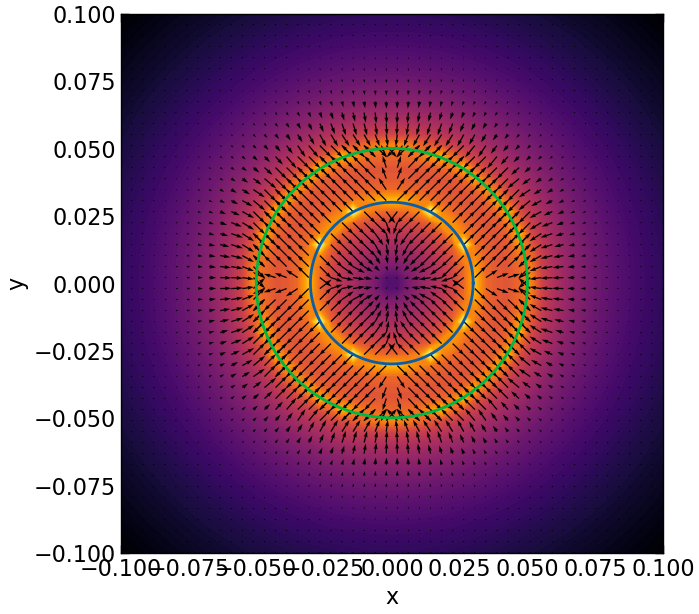

In [61]:
# Plot
# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-10e-2, x_max=10e-2, y_min=-10e-2, y_max=10e-2, num_grids=50, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l1 = radius1
l2 = radius2
x1 = l1 * np.cos(t)
y1 = l1 * np.sin(t)
x2 = l2 * np.cos(t)
y2 = l2 * np.sin(t)
plt.plot(x1, y1, x2, y2)
plt.show()